In [1]:
import pandas as pd
import json
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import re

In [2]:
train = pd.read_json('data/train.json') 
test = pd.read_json('data/test.json')

In [3]:
train.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [5]:
print("train data :", train.shape)
print("test data :" ,test.shape)

train data : (39774, 3)
test data : (9944, 2)


In [6]:
test.head()

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."


In [11]:
# Unbalanced target data （percent）
train.cuisine.value_counts()/train.shape[0]*100

italian         19.706341
mexican         16.186453
southern_us     10.861367
indian           7.550158
chinese          6.720471
french           6.652587
cajun_creole     3.886961
thai             3.869362
japanese         3.577714
greek            2.954191
spanish          2.486549
korean           2.086790
vietnamese       2.074219
moroccan         2.064163
british          2.021421
filipino         1.898225
irish            1.676975
jamaican         1.322472
russian          1.229446
brazilian        1.174134
Name: cuisine, dtype: float64

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


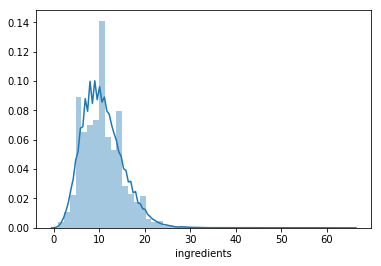

In [12]:
import seaborn as sns
%matplotlib inline
sns.distplot(train['ingredients'].str.len())

[Text(0, 0, 'greek'),
 Text(0, 0, 'southern_us'),
 Text(0, 0, 'filipino'),
 Text(0, 0, 'indian'),
 Text(0, 0, 'jamaican'),
 Text(0, 0, 'spanish'),
 Text(0, 0, 'italian'),
 Text(0, 0, 'mexican'),
 Text(0, 0, 'chinese'),
 Text(0, 0, 'british'),
 Text(0, 0, 'thai'),
 Text(0, 0, 'vietnamese'),
 Text(0, 0, 'cajun_creole'),
 Text(0, 0, 'brazilian'),
 Text(0, 0, 'french'),
 Text(0, 0, 'japanese'),
 Text(0, 0, 'irish'),
 Text(0, 0, 'korean'),
 Text(0, 0, 'moroccan'),
 Text(0, 0, 'russian')]

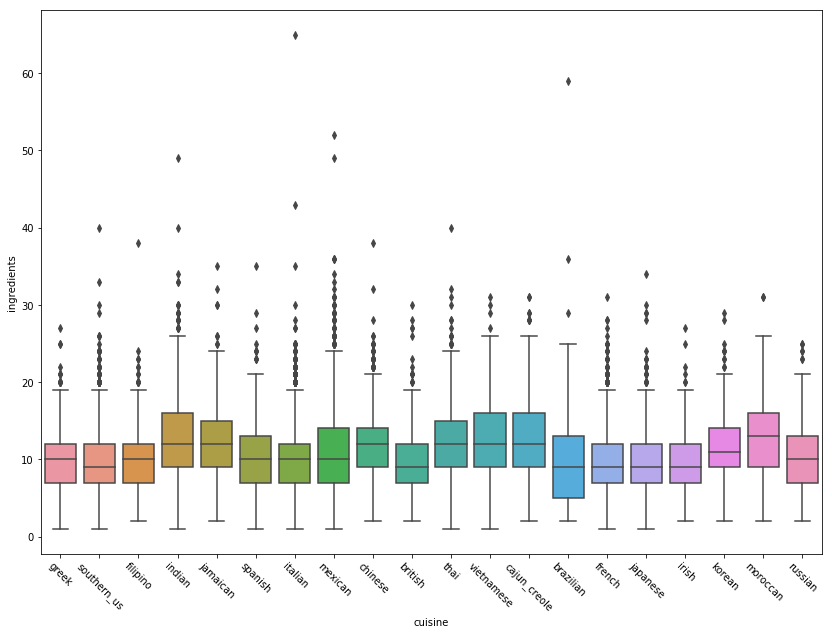

In [17]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize = (14, 10))
sns.boxplot(x=train.cuisine,y=train['ingredients'].str.len())
ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)

In [19]:
# Frequently appearing items
item_collect=[]
for items in train['ingredients']:
    for item in items:
        item_collect.append(item) 





In [20]:
from collections import Counter
result = dict(Counter(item_collect))

In [26]:
sorted(result.items(), key=lambda item:item[1],reverse=True)[:10]

[('salt', 18049),
 ('onions', 7972),
 ('olive oil', 7972),
 ('water', 7457),
 ('garlic', 7380),
 ('sugar', 6434),
 ('garlic cloves', 6237),
 ('butter', 4848),
 ('ground black pepper', 4785),
 ('all-purpose flour', 4632)]

In [53]:
features = [] 
for item in train['ingredients']:
    features.append(item)
ingredients = [] 
for item in train['ingredients']:
    for ingr in item:
        ingredients.append(ingr) 
tfidf = TfidfVectorizer(vocabulary= list(set([str(i).lower() for i in ingredients])), max_df=0.99, norm='l2', ngram_range=(1, 1))


In [54]:
features1 = []
for items in features:
    features1.append(" ".join(items))
    

In [55]:
features1

['romaine lettuce black olives grape tomatoes garlic pepper purple onion seasoning garbanzo beans feta cheese crumbles',
 'plain flour ground pepper salt tomatoes ground black pepper thyme eggs green tomatoes yellow corn meal milk vegetable oil',
 'eggs pepper salt mayonaise cooking oil green chilies grilled chicken breasts garlic powder yellow onion soy sauce butter chicken livers',
 'water vegetable oil wheat salt',
 'black pepper shallots cornflour cayenne pepper onions garlic paste milk butter salt lemon juice water chili powder passata oil ground cumin boneless chicken skinless thigh garam masala double cream natural yogurt bay leaf',
 'plain flour sugar butter eggs fresh ginger root salt ground cinnamon milk vanilla extract ground ginger powdered sugar baking powder',
 'olive oil salt medium shrimp pepper garlic chopped cilantro jalapeno chilies flat leaf parsley skirt steak white vinegar sea salt bay leaf chorizo sausage',
 'sugar pistachio nuts white almond bark flour vanilla e

In [56]:
X_tr = tfidf.fit_transform(features1)
feature_names = tfidf.get_feature_names()
target = train['cuisine']

In [57]:
len(set([str(i).lower() for i in ingredients]))

6703

In [58]:
X_tr

<39774x6703 sparse matrix of type '<class 'numpy.float64'>'
	with 456613 stored elements in Compressed Sparse Row format>

In [60]:

test_X =  tfidf.transform(test['ingredients'].apply(' '.join))

In [61]:
test_X

<9944x6703 sparse matrix of type '<class 'numpy.float64'>'
	with 114462 stored elements in Compressed Sparse Row format>

In [63]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn import model_selection 
lb = LabelEncoder()
train_Y = lb.fit_transform(train.cuisine)

In [64]:
lr = LogisticRegression(random_state = 42)

In [65]:
kfold = model_selection.KFold(n_splits=10, random_state=42)
valscores = model_selection.cross_val_score(lr, X_tr, train_Y, cv=kfold)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [66]:
valscores.mean()

0.7353295526704392

In [67]:
rf = RandomForestClassifier(n_estimators = 300,random_state = 42)

In [69]:
vect = TfidfVectorizer(binary=True, max_features=2000)

In [70]:
x_train=vect.fit_transform(train['ingredients'].apply(' '.join))


In [71]:
x_train

<39774x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 760308 stored elements in Compressed Sparse Row format>

In [72]:
kfold = model_selection.KFold(n_splits=10, random_state=42)
valscores = model_selection.cross_val_score(lr, x_train, train_Y, cv=kfold)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [73]:
valscores.mean()

0.7802834688094047